## Forest type mapping

### Team members

* August Rodermans  - 1701212999

* Jason Tian        - 1701213094

* Daniel Bonfil     - 1801214680

### Goal

We use machine learning algorithms to categorize tree species, based on their color index on satellite images taken in September, March and May. This project uses a dataset made available by UC Irvine Machine Learning Repository. We think the project is interesting and meaningful, because the output (forest type map) can be used to identify and/or quantify ecosystem services (e.g.: carbon storage, erosion protection) provided by the forest, which has significant effect on environment protection.

#### We use machine learning algorithms to categorize land in four types of forest, namely:

 - s: Sugi forest
 - h: Hinoki forest
 - d: Mixed deciduous forest
 - o: Other non forest land*

#### The features we use are:
 
- b1 - b9: ASTER image bands containing spectral information in the green, red, and near infrared wavelengths for three dates (Sept. 26, 2010; March 19, 2011; May 08, 2011.)
- pred_minus_obs_S_b1 - pred_minus_obs_S_b9: Predicted spectral values (based on spatial interpolation) minus actual spectral values for the 's' class (b1-b9)
- pred_minus_obs_H_b1 - pred_minus_obs_H_b9: Predicted spectral values (based on spatial interpolation) minus actual spectral values for the 'h' class (b1-b9)

### Data Source

* UC Irvine Machine Learning Repository: http://archive.ics.uci.edu/ml/datasets/Forest+type+mapping


Refference:
Johnson, B., Tateishi, R., and Xie, Z., 2012, Using geographically weighted variables for image classification, remote sensing letters,Vol.3 No. 6


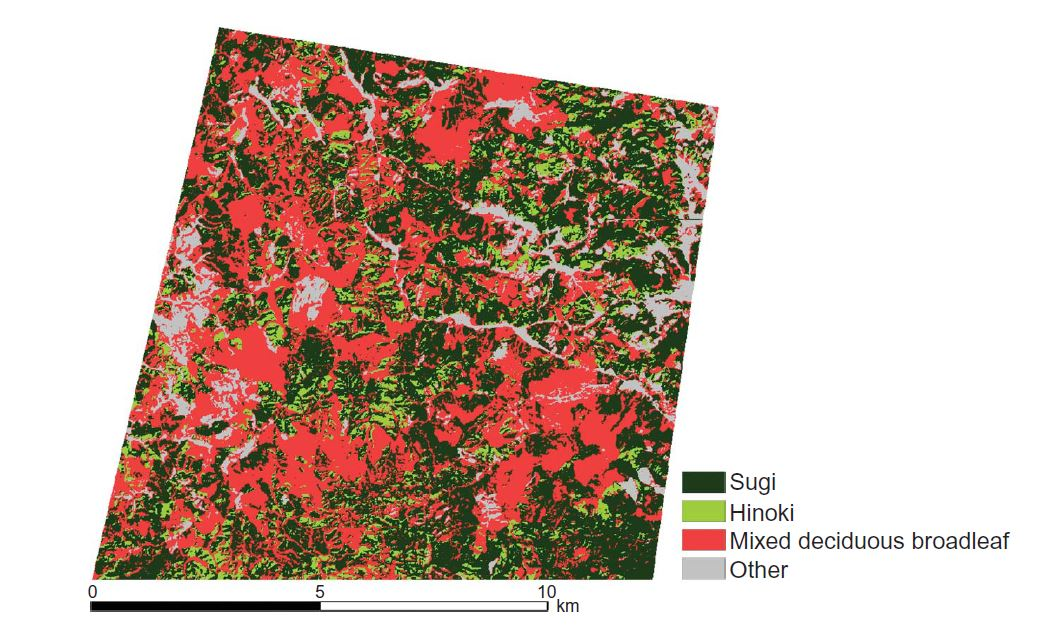

In [2]:
from IPython.display import Image
%matplotlib inline
print("Refference:\nJohnson, B., Tateishi, R., and Xie, Z., 2012, Using geographically weighted variables for image classification, remote sensing letters,Vol.3 No. 6")
Image(filename='C:/Users/Rodermans/Desktop/woods.png', width=500)

### What we did:
* Visualize the data with Seaborn
* Feature selection / dimension reduction
* Support Vector Machine
* Neural network
* performance comparison

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import train_test_split

#df_tree=pd.read_csv('C:\Users\Jason\Desktop\MLdata.csv')

#read the excel files
#df_tree= pd.read_csv('C:/Users/Jason/Desktop/MLdata.csv')

#read the excel files
df_tree_train = pd.read_csv('C:/Users/Rodermans/Desktop/Forrest/training.csv')
df_tree_test = pd.read_csv('C:/Users/Rodermans/Desktop/Forrest/testing.csv')

#combine both excel files
frames = [df_tree_train, df_tree_test]
df_tree = pd.concat(frames)

#df_tree_test = pd.read_csv('C:/Users/MI/Desktop/testing.csv')

#combine both excel files
#frames = [df_tree_train, df_tree_test]
#df_tree = pd.concat(frames)

#sort by class
#df_tree = df_tree.sort_values(by=['class'])

df_tree.head()

In [2]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

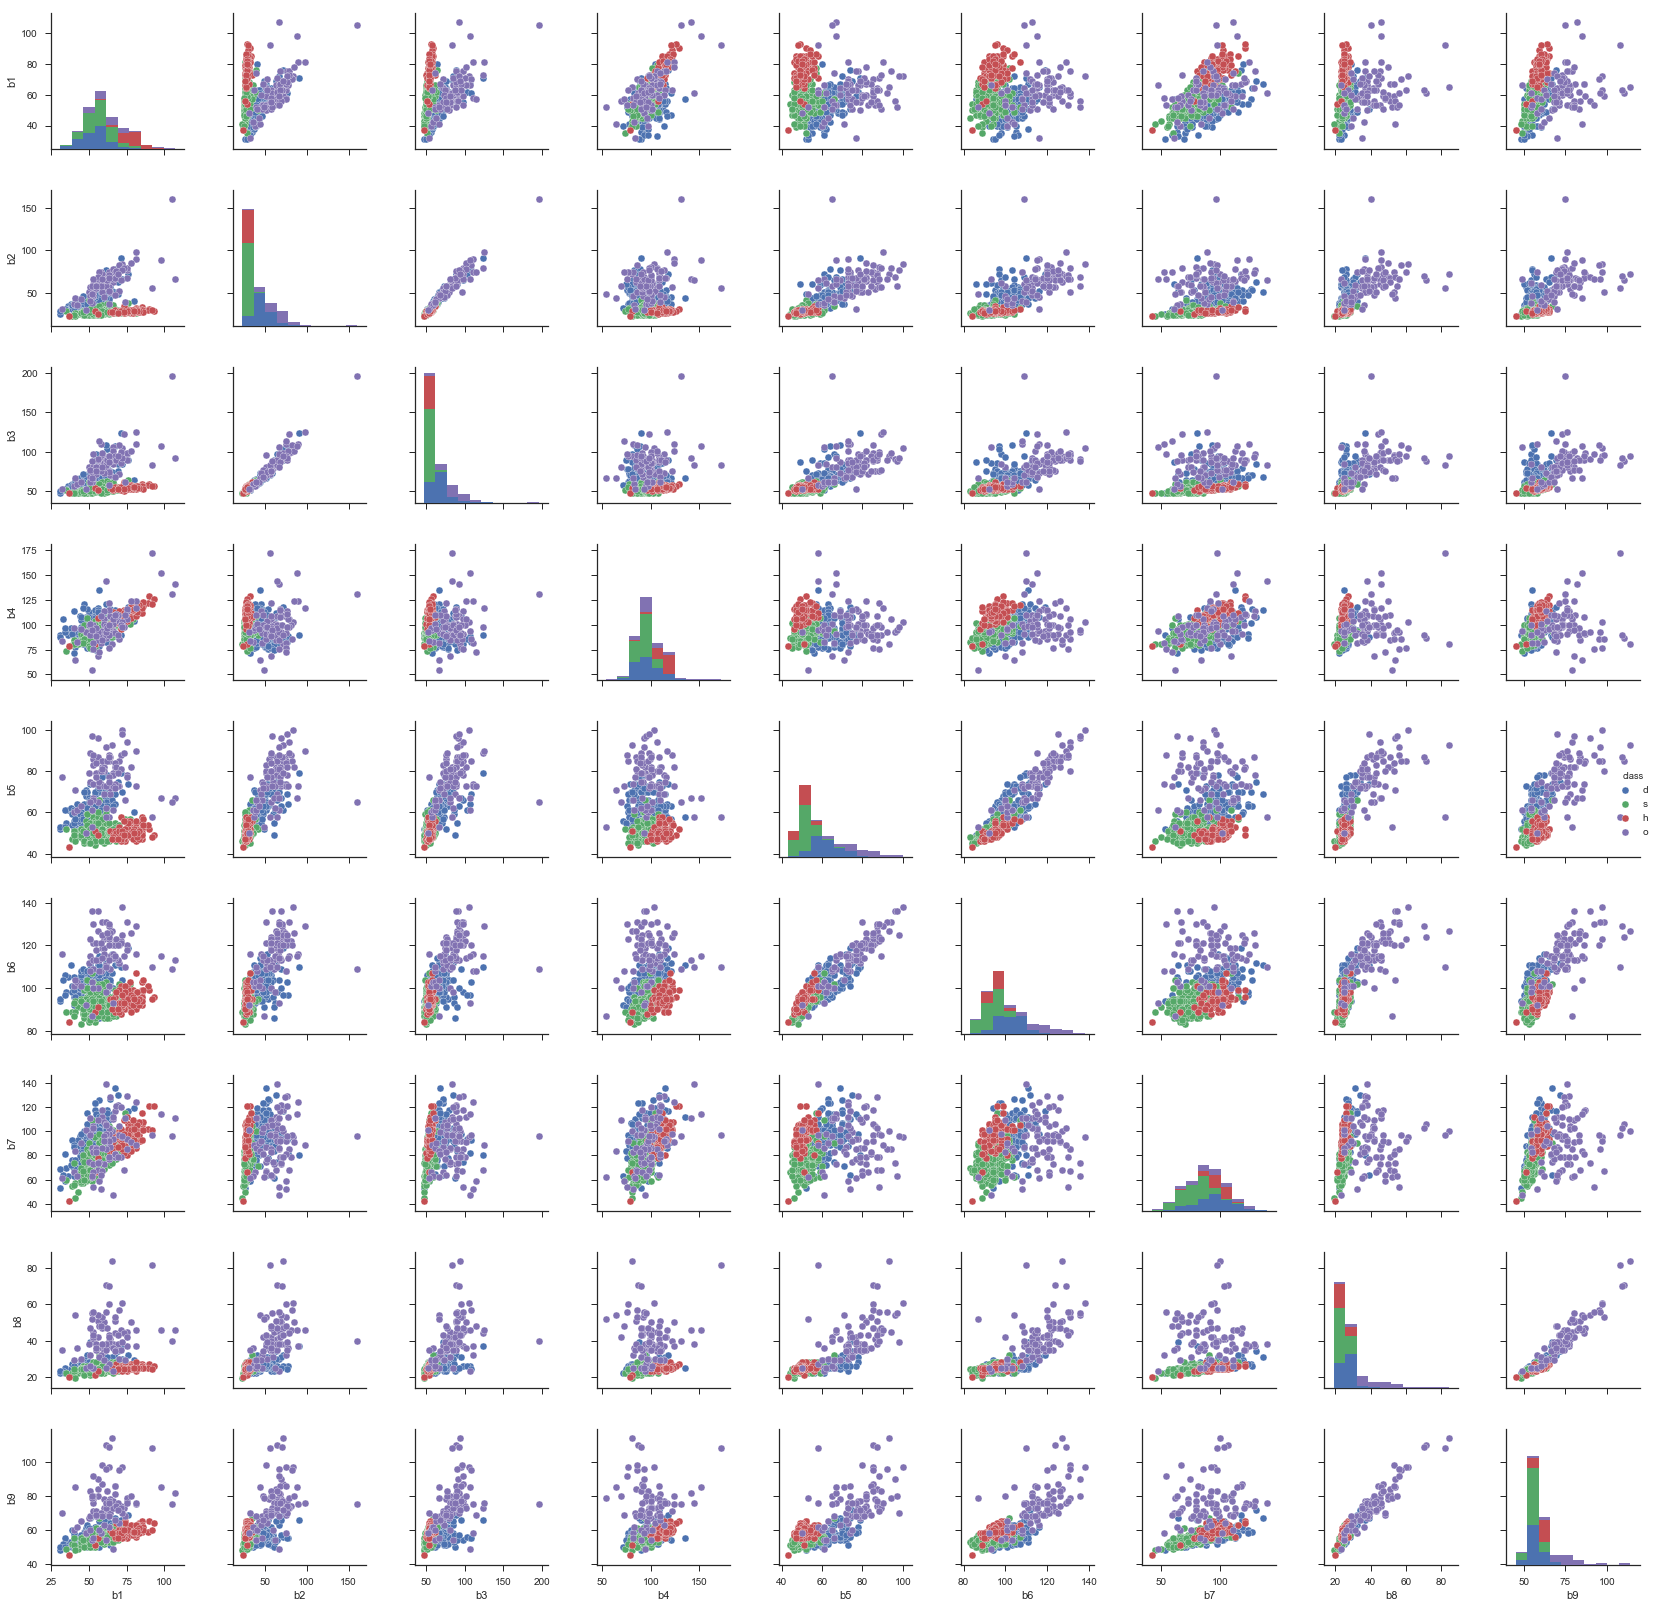

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
cols = ['class', 'b1', 'b2', 'b3','b4','b5','b5','b6','b7','b8','b9']

cols = ['class','b1','b2','b3','b4','b5','b6','b7','b8','b9']
sns.pairplot(df_tree[cols], hue="class", size = 2.5)

plt.tight_layout()
# plt.savefig('images/10_03.png', dpi=300)
plt.show()

In [4]:
#df_tree = pd.DataFrame(df_tree)
#df_tree = df_tree.replace(to_replace=['d','h','o','s'], 
                #value=['1','2','3','4'], regex=True)

class_mapping={label:idx for idx,label in enumerate(np.unique(df_tree['class']))}
df_tree['class']=df_tree['class'].map(class_mapping)

#y=df.iloc[0:523,0].values
#change the features to test the accuracy
X, y = df_tree.iloc[:, 1:].values, df_tree.iloc[:, 0].values

print(df_tree)

     class  b1  b2  b3   b4  b5   b6   b7  b8  b9         ...           \
0        0  67  51  68  115  69  111  136  31  67         ...            
1        3  67  28  51   99  50   97   82  26  59         ...            
2        3  63  26  50   95  49   91   81  26  57         ...            
3        0  63  42  63   97  66  108  111  28  59         ...            
4        3  46  27  50   83  51   90   76  26  56         ...            
5        0  59  59  84   93  70  104   92  29  58         ...            
6        1  83  28  54  117  51   96  105  27  64         ...            
7        2  63  37  58   95  58  101   89  27  62         ...            
8        3  77  29  52  103  51   93   87  27  59         ...            
9        0  57  44  65  107  59  104   98  26  59         ...            
10       3  65  29  52  101  51   95   89  28  62         ...            
11       2  53  55  76   99  86  121  104  41  78         ...            
12       0  45  36  60   97  57  102  

In [5]:
from sklearn.model_selection import train_test_split

X, y = df_tree.iloc[:, 1:].values, df_tree.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, 
                     stratify=y,
                     random_state=0)

In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [65]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[1.0206e+01 4.8659e+00 3.9492e+00 2.0896e+00 1.4388e+00 1.2321e+00
 8.4955e-01 6.3852e-01 5.6631e-01 3.5615e-01 3.3324e-01 1.7743e-01
 1.1772e-01 6.0849e-02 5.1876e-02 3.4242e-02 2.7592e-02 2.6647e-02
 2.4759e-02 1.2481e-02 7.5649e-03 3.2391e-03 2.5921e-03 8.4391e-04
 2.6540e-04 9.3578e-05 2.7110e-05]


In [67]:
from sklearn.decomposition import PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([3.7698e-01, 1.7972e-01, 1.4587e-01, 7.7180e-02, 5.3144e-02,
       4.5508e-02, 3.1379e-02, 2.3584e-02, 2.0917e-02, 1.3155e-02,
       1.2309e-02, 6.5535e-03, 4.3481e-03, 2.2475e-03, 1.9161e-03,
       1.2647e-03, 1.0191e-03, 9.8421e-04, 9.1449e-04, 4.6100e-04,
       2.7942e-04, 1.1964e-04, 9.5741e-05, 3.1170e-05, 9.8029e-06,
       3.4564e-06, 1.0013e-06])

In [ ]:
# Before PCA, we need more than 12 features to do the classification,after using PCA, we just need two.

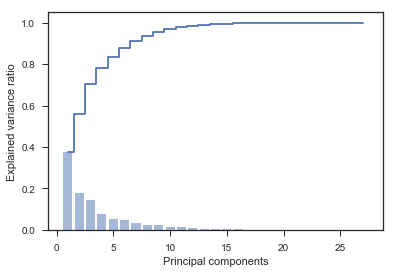

In [68]:
plt.bar(range(1, 28), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 28), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

In [69]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

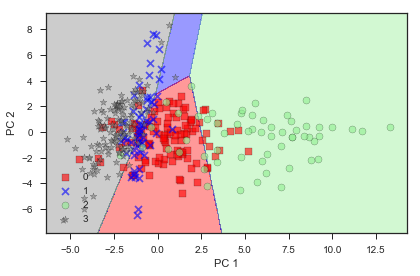

In [73]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '*', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl) 
        
        
from sklearn.linear_model import LogisticRegression

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr = LogisticRegression()
lr = lr.fit(X_train_pca, y_train)

plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_04.png', dpi=300)
plt.show()

In [74]:
#LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.fit_transform(X_test_std, y_test)

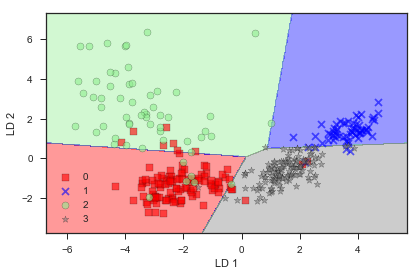

In [75]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr = lr.fit(X_train_lda, y_train)

plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_09.png', dpi=300)
plt.show()

In [76]:
y_pred=lr.predict(X_test_lda)
print('Misclassified samples: %d'%(y_test != y_pred).sum())

from sklearn.metrics import accuracy_score
print('Accuracy: %2f' % accuracy_score(y_test,y_pred))

Misclassified samples: 51
Accuracy: 0.675159


C:\Users\Jason\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


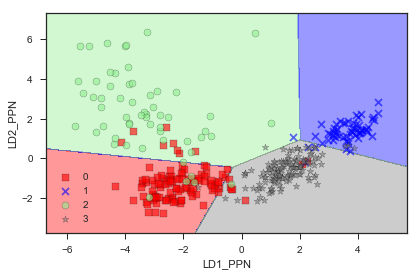

In [77]:
from sklearn.linear_model import Perceptron
ppn=Perceptron(n_iter=40,eta0=0.1,random_state=1)
ppn.fit(X_train_lda,y_train)

plot_decision_regions(X_train_lda, y_train, classifier=ppn)
plt.xlabel('LD1_PPN')
plt.ylabel('LD2_PPN')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_09.png', dpi=300)
plt.show()

In [78]:
y_pred=ppn.predict(X_test_lda)
print('Misclassified samples: %d'%(y_test != y_pred).sum())

from sklearn.metrics import accuracy_score
print('Accuracy: %2f' % accuracy_score(y_test,y_pred))

Misclassified samples: 50
Accuracy: 0.681529


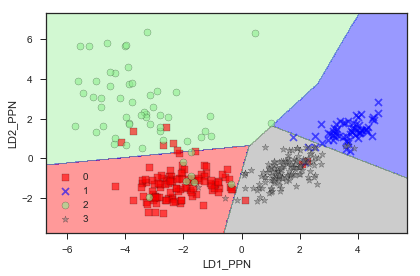

In [79]:
from sklearn.svm import SVC
svm=SVC(kernel='linear',C=1.0,random_state=1)
svm.fit(X_train_lda,y_train)
plot_decision_regions(X_train_lda, y_train, classifier=svm)
plt.xlabel('LD1_PPN')
plt.ylabel('LD2_PPN')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_09.png', dpi=300)
plt.show()


In [80]:
y_pred=svm.predict(X_test_lda)
print('Misclassified samples: %d'%(y_test != y_pred).sum())

from sklearn.metrics import accuracy_score
print('Accuracy: %2f' % accuracy_score(y_test,y_pred))

Misclassified samples: 32
Accuracy: 0.796178


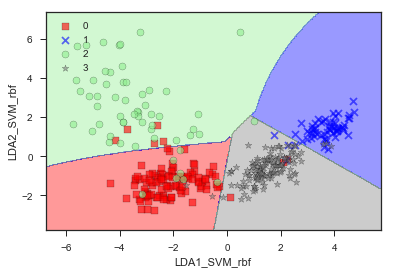

In [81]:
svm2=SVC(kernel='rbf',random_state=1,gamma=0.01,C=10.0)
svm2.fit(X_train_lda,y_train)
plot_decision_regions(X_train_lda, y_train, classifier=svm2)


plt.xlabel('LDA1_SVM_rbf')
plt.ylabel('LDA2_SVM_rbf')
plt.legend(loc='upper left')

plt.show()

In [82]:
y_pred=svm2.predict(X_test_lda)
print('Misclassified samples: %d'%(y_test != y_pred).sum())

from sklearn.metrics import accuracy_score
print('Accuracy: %2f' % accuracy_score(y_test,y_pred))

Misclassified samples: 29
Accuracy: 0.815287


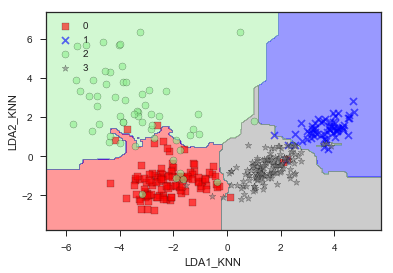

In [83]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4,p=1,metric='minkowski')
knn.fit(X_train_lda,y_train)

plot_decision_regions(X_train_lda, y_train, classifier=knn)
plt.xlabel('LDA1_KNN')
plt.ylabel('LDA2_KNN')
plt.legend(loc='upper left')

plt.show()

In [84]:
y_pred=knn.predict(X_test_lda)
print('Misclassified samples: %d'%(y_test != y_pred).sum())

from sklearn.metrics import accuracy_score
print('Accuracy: %2f' % accuracy_score(y_test,y_pred))

Misclassified samples: 32
Accuracy: 0.796178


In [85]:
# Majority Voting

from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
clf1 = LogisticRegression(penalty='l2', 
                          C=0.001,
                          random_state=1)

clf2 = Perceptron(n_iter=40,eta0=0.1,random_state=1)

clf3 = KNeighborsClassifier(n_neighbors=1,
                            p=2,
                            metric='minkowski')

clf4=SVC(kernel='linear',C=1.0,random_state=1)

clf5=SVC(kernel='rbf',random_state=1,gamma=0.2,C=10.0)

pipe1 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf1]])
pipe2 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf2]])
pipe3 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf3]])
pipe4 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf4]])
pipe5 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf5]])

clf_labels = ['Logistic regression','Perceptron ','KNN','SVM_linear', 'SVM_rbf']

print('10-fold cross validation:\n')
for clf, label in zip([pipe1, pipe2, pipe3,pipe4,pipe5], clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train_lda,
                             y=y_train,
                             cv=10)
                            # scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

10-fold cross validation:

ROC AUC: 0.88 (+/- 0.03) [Logistic regression]
ROC AUC: 0.88 (+/- 0.07) [Perceptron ]
ROC AUC: 0.88 (+/- 0.05) [KNN]
ROC AUC: 0.93 (+/- 0.05) [SVM_linear]


C:\Users\Jason\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Jason\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Jason\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Jason\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Jason\Anaconda3\lib\site-packages\sklearn\linear_model\stochast

ROC AUC: 0.93 (+/- 0.04) [SVM_rbf]


In [86]:
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.externals import six
from sklearn.base import clone
from sklearn.pipeline import _name_estimators
import numpy as np
import operator


class MajorityVoteClassifier(BaseEstimator, 
                             ClassifierMixin):
    """ A majority vote ensemble classifier

    Parameters
    ----------
    classifiers : array-like, shape = [n_classifiers]
      Different classifiers for the ensemble

    vote : str, {'classlabel', 'probability'} (default='label')
      If 'classlabel' the prediction is based on the argmax of
        class labels. Else if 'probability', the argmax of
        the sum of probabilities is used to predict the class label
        (recommended for calibrated classifiers).

    weights : array-like, shape = [n_classifiers], optional (default=None)
      If a list of `int` or `float` values are provided, the classifiers
      are weighted by importance; Uses uniform weights if `weights=None`.

    """
    def __init__(self, classifiers, vote='classlabel', weights=None):
        self.classifiers = classifiers
        self.named_classifiers = {key: value for key, value
                                  in _name_estimators(classifiers)}
        self.vote = vote
        self.weights = weights

    def fit(self, X, y):
        """ Fit classifiers.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Matrix of training samples.

        y : array-like, shape = [n_samples]
            Vector of target class labels.

        Returns
        -------
        self : object

        """
        if self.vote not in ('probability', 'classlabel'):
            raise ValueError("vote must be 'probability' or 'classlabel'"
                             "; got (vote=%r)"
                             % self.vote)
            
        if self.weights and len(self.weights) != len(self.classifiers):
            raise ValueError('Number of classifiers and weights must be equal'
                             '; got %d weights, %d classifiers'
                             % (len(self.weights), len(self.classifiers)))

        # Use LabelEncoder to ensure class labels start with 0, which
        # is important for np.argmax call in self.predict
        self.lablenc_ = LabelEncoder()
        self.lablenc_.fit(y)
        self.classes_ = self.lablenc_.classes_
        self.classifiers_ = []
        for clf in self.classifiers:
            fitted_clf = clone(clf).fit(X, self.lablenc_.transform(y))
            self.classifiers_.append(fitted_clf)
        return self

    def predict(self, X):
        """ Predict class labels for X.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Matrix of training samples.

        Returns
        ----------
        maj_vote : array-like, shape = [n_samples]
            Predicted class labels.
            
        """
        if self.vote == 'probability':
            maj_vote = np.argmax(self.predict_proba(X), axis=1)
        else:  # 'classlabel' vote

 #  Collect results from clf.predict calls
            predictions = np.asarray([clf.predict(X)
                                      for clf in self.classifiers_]).T

            maj_vote = np.apply_along_axis(
                                      lambda x:
                                      np.argmax(np.bincount(x,
                                                weights=self.weights)),
                                      axis=1,
                                      arr=predictions)
        maj_vote = self.lablenc_.inverse_transform(maj_vote)
        return maj_vote

    def predict_proba(self, X):
        """ Predict class probabilities for X.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.

        Returns
        ----------
        avg_proba : array-like, shape = [n_samples, n_classes]
            Weighted average probability for each class per sample.

        """
        probas = np.asarray([clf.predict_proba(X)
                             for clf in self.classifiers_])
        avg_proba = np.average(probas, axis=0, weights=self.weights)
        return avg_proba

    def get_params(self, deep=True):
        """ Get classifier parameter names for GridSearch"""
        if not deep:
            return super(MajorityVoteClassifier, self).get_params(deep=False)
        else:
            out = self.named_classifiers.copy()
            for name, step in six.iteritems(self.named_classifiers):
                for key, value in six.iteritems(step.get_params(deep=True)):
                    out['%s__%s' % (name, key)] = value
            return out

In [95]:
# Majority Rule (hard) Voting

mv_clf = MajorityVoteClassifier(classifiers=[pipe1, pipe2, pipe3 ,pipe4, pipe5])

clf_labels += ['Majority voting']
all_clf = [pipe1, clf2, pipe3,pipe4,pipe5, mv_clf]

for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=10)
                             #scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

ROC AUC: 0.81 (+/- 0.05) [Logistic regression]
ROC AUC: 0.86 (+/- 0.05) [Perceptron ]
ROC AUC: 0.83 (+/- 0.04) [KNN]
ROC AUC: 0.91 (+/- 0.04) [SVM_linear]


C:\Users\Jason\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Jason\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Jason\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Jason\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Jason\Anaconda3\lib\site-packages\sklearn\linear_model\stochast

ROC AUC: 0.85 (+/- 0.06) [SVM_rbf]


C:\Users\Jason\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Jason\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Jason\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Jason\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not 

ROC AUC: 0.90 (+/- 0.03) [Majority voting]


C:\Users\Jason\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Jason\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [87]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
colors = ['black', 'orange', 'blue', 'green']
linestyles = [':', '--', '-.', '-']
for clf, label, clr, ls \
        in zip(all_clf,
               clf_labels, colors, linestyles):

    # assuming the label of the positive class is 1
    y_pred = clf.fit(X_train,
                     y_
                     train).predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr,
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')


#plt.savefig('images/07_04', dpi=300)
plt.show()

SyntaxError: invalid syntax (<ipython-input-87-3ccac0823e14>, line 11)